# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# Import data

In [2]:
order_df = pd.read_csv('../data/original_data/olist_orders_dataset.csv') 
reviews_df = pd.read_csv('../data/original_data/olist_order_reviews_dataset.csv')
order_product_df = pd.read_csv('../data/processed_data/olist_order_product.csv') 
delivered_df = pd.read_csv('../data/processed_data/olist_delivered_customers.csv') 

# Overview data

**Overview order_df**

In [3]:
print('Shape:', order_df.shape)
order_df.head()

Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Check null value of 'order_df'
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Overview reviews_df**

In [5]:
print('Shape:', reviews_df.shape)
reviews_df.head()

Shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
# Check null value of 'reviews_df'
reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Overview order_product_df**

In [7]:
print('Shape:', order_product_df.shape)
order_product_df.head()

Shape: (112650, 9)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,furniture decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,garden tools


In [8]:
# Check null value of 'order_product_df'
order_product_df.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
seller_id                0
shipping_limit_date      0
price                    0
freight_value            0
value                    0
product_category_name    0
dtype: int64

**Overview delivered_df**

In [9]:
print('Shape:', delivered_df.shape)
delivered_df.head()

Shape: (96478, 17)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25


In [10]:
# Check null value of 'delivered_df'
delivered_df.isnull().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
customer_country                  0
geolocation_lat                   0
geolocation_lng                   0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     0
order_estimated_delivery_date     0
total_number_of_items             0
total_order_value                 0
dtype: int64

In [11]:
# Convert some columns below to datetime
delivered_df['order_purchase_timestamp'] = pd.to_datetime(delivered_df.order_purchase_timestamp, errors='coerce')
delivered_df['order_approved_at'] = pd.to_datetime(delivered_df.order_approved_at, errors='coerce')
delivered_df['order_delivered_carrier_date'] = pd.to_datetime(delivered_df.order_delivered_carrier_date, errors='coerce')
delivered_df['order_delivered_customer_date'] = pd.to_datetime(delivered_df.order_delivered_customer_date, errors='coerce')
delivered_df['order_estimated_delivery_date'] = pd.to_datetime(delivered_df.order_estimated_delivery_date, errors='coerce')

In [12]:
delivered_df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_country                         object
geolocation_lat                         float64
geolocation_lng                         float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
total_number_of_items                     int64
total_order_value                       float64
dtype: object

**Merge 2 data frames `delivered_df` and `order_product_df` as `item_product_category`**

In [13]:
item_product_category = delivered_df[['order_id']].merge(order_product_df[['order_id', 'order_item_id', 'value', 'product_category_name']], on='order_id', how='left')
print('Shape:', item_product_category.shape)
item_product_category['product_category_name'] = item_product_category['product_category_name'].str.replace('_', ' ')
item_product_category.head()

Shape: (110197, 4)


,order_id,order_item_id,value,product_category_name
0,00e7ee1b050b8499577073aeb2a297a1,1,146.87,office furniture
1,29150127e6685892b6eab3eec79f59c7,1,335.48,housewares
2,b2059ed67ce144a36e2aa97d2c9e9ad2,1,157.73,office furniture
3,951670f92359f4fe4a63112aa7306eba,1,173.30,office furniture
4,6b7d50bd145f6fc7f33cebabd7e49d0f,1,252.25,home confort


In [14]:
# Check null value of 'item_product_category'
item_product_category.isnull().sum()

order_id                 0
order_item_id            0
value                    0
product_category_name    0
dtype: int64

# Order analysis

## Total orders

In [15]:
total_orders = order_df.order_id.nunique()
total_orders

99441

## Orders by status

In [16]:
# Calculate number of orders by status
order_status_df = order_df.groupby(['order_status']).agg({'order_id':'nunique'})\
                          .sort_values(by='order_id', ascending=False).reset_index() \
                          .rename(columns={'order_id':'number_of_orders'}) 
order_status_df['percentage'] = round(order_status_df.number_of_orders / order_status_df.number_of_orders.sum() * 100, 2)
print('Shape:', order_status_df.shape)
order_status_df

Shape: (8, 3)


,order_status,number_of_orders,percentage
0,delivered,96478,97.02
1,shipped,1107,1.11
2,canceled,625,0.63
3,unavailable,609,0.61
4,invoiced,314,0.32
5,processing,301,0.30
6,created,5,0.01
7,approved,2,0.00


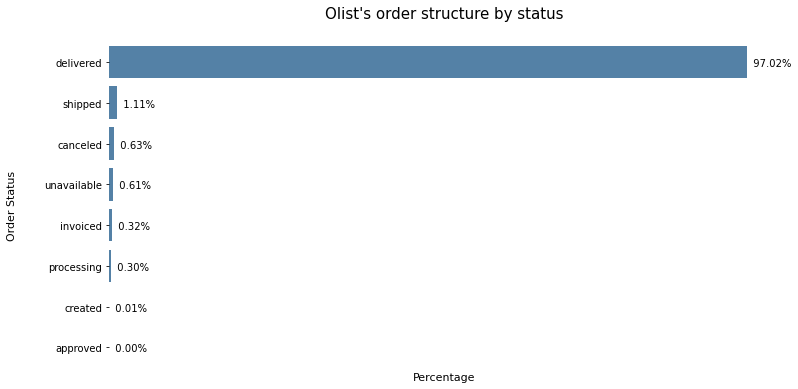

In [17]:
# Visualize order quantity percentage by status
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=order_status_df['percentage'], y=order_status_df['order_status'], data=order_status_df, ax=ax, color='steelblue')
sns.despine(bottom = True, left = True)
ax.set_title('Olist\'s order structure by status\n', fontsize=15)
ax.set_xlabel('Percentage', fontsize=11)
ax.set_ylabel('Order Status\n\n', fontsize=11)
ax.set(xticks=[])
for i, v in enumerate(order_status_df['percentage']):
    ax.text(v, i+0.10, '  {:.2f}'.format(v) + '%', color='black', ha='left')
plt.show()

**Comment:** Most of Olist's orders have been delivered, 96478 orders out of a total of 99441 orders, accounting for 97.02%. Only a few orders were canceled 0.63% or unavailable 0.61%. The remaining orders are in the status: created, approved, processed, invoiced, shipped.

**Note:** The analysis below focuses only on delivered orders.

## Orders by location

**Orders by state**

In [18]:
# Calculate number of orders by state
state_df = delivered_df.groupby(['customer_country', 'customer_state']).agg({'order_id':'nunique'})\
                         .sort_values(by='order_id', ascending=False).reset_index() \
                         .rename(columns={'customer_country':'Country', 'customer_state':'State', 'order_id':'Number of orders'}) 
print('Shape:', state_df.shape)
state_df.head(10)

Shape: (27, 3)


,Country,State,Number of orders
0,Brazil,SP,40501
1,Brazil,RJ,12350
2,Brazil,MG,11354
3,Brazil,RS,5345
4,Brazil,PR,4923
5,Brazil,SC,3546
6,Brazil,BA,3256
7,Brazil,DF,2080
8,Brazil,ES,1995
9,Brazil,GO,1957


In [19]:
# Create function to load json file
def read_json(arq_json):
    with open(arq_json, 'r', encoding='utf8') as f:
        return json.load(f)

In [20]:
# Load json file
brazil_geo = read_json('../data/map/brazil_geo.json')

In [21]:
# # Visualize orders distribution map

# fig = px.choropleth(state_df,                                                           # Uncomment and run the code to see the interactive map
#                     geojson=brazil_geo,
#                     locations='State',
#                     color='Number of orders',
#                     color_continuous_scale='Blues',
#                     title='Olist\'s order distribution map')

# fig.update_geos(fitbounds="locations", visible=False)

# fig.update_layout(autosize=False,
#                   width=1200,
#                   height=600,
#                   title_font_size=25)

# fig.show()

In [22]:
# # Save map as png
# fig.write_image('image/orders_by_state_map.png')

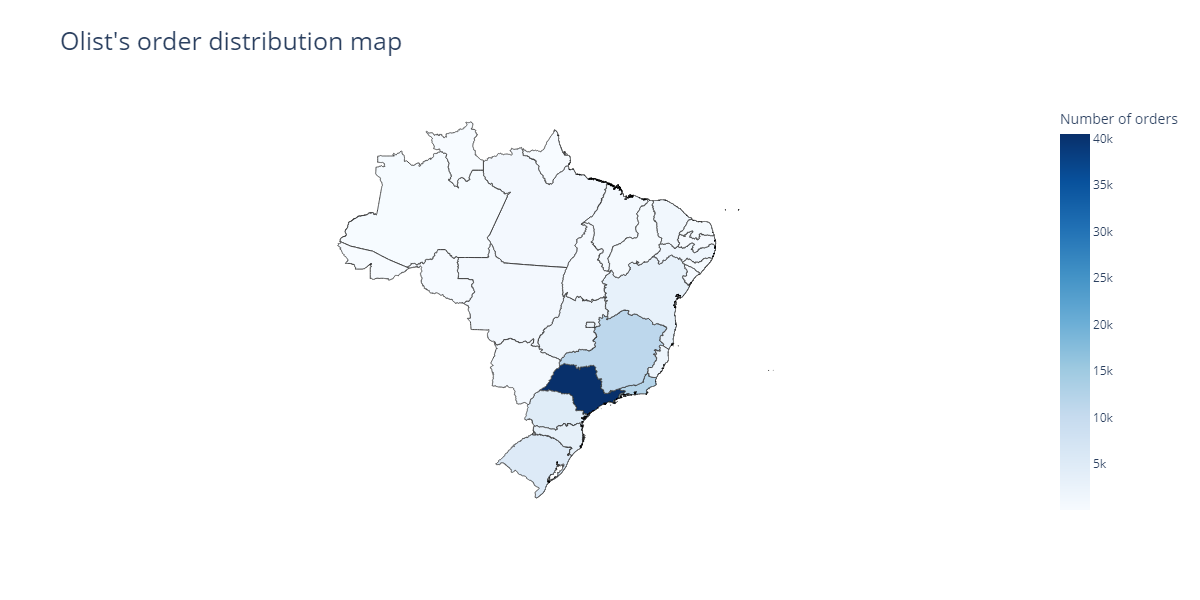

In [23]:
# Display map
Image(filename = '../image/orders_by_state_map.png', width=1200)

**Comment:** Same as Olist's distribution of customers by state (see file [customer_analysis_1.ipynb](customer_analysis_1.ipynb)
). The states that bring the most orders to Olist are concentrated mainly in Southeastern of Brazil. In which state SP has the most orders with 40501 orders. In addition, the 10 states with the most orders are shown in the chart below.

In [24]:
print(state_df.head(10).State.tolist())

['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'DF', 'ES', 'GO']


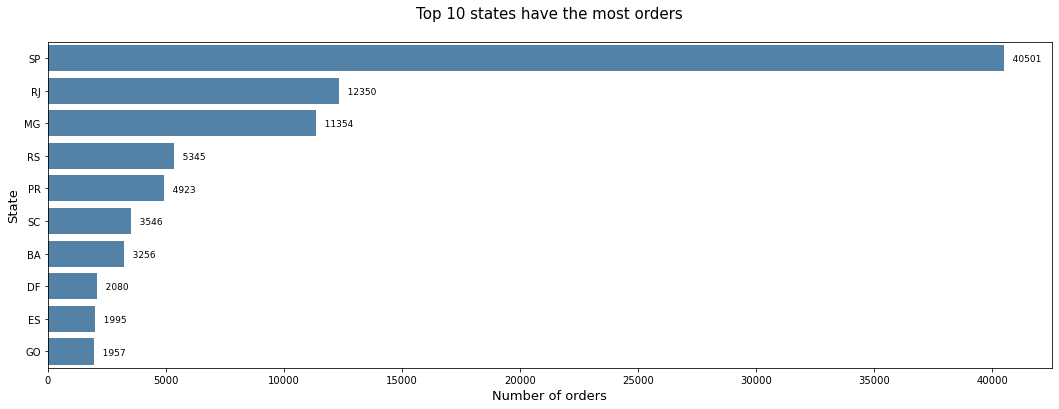

In [25]:
# Visualize top 10 states have the most sales
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(y='State', x='Number of orders', data=state_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 states have the most orders\n', fontsize=15)
ax.set_xlabel('Number of orders', fontsize=13)
ax.set_ylabel('State', fontsize=13)
for i, v in enumerate(state_df.head(10)['Number of orders']):
    ax.text(v, i+0.10, '   {}'.format(v), color='black', ha='left', fontsize=9)
plt.ticklabel_format(style='plain', axis='X')
plt.show()

**Orders by city**

In [26]:
# Calculate sales by city
city_df = delivered_df.groupby(['customer_country', 'customer_state', 'customer_city']).agg({'order_id':'nunique'})\
                        .sort_values(by='order_id', ascending=False).reset_index() \
                        .rename(columns={'customer_country':'Country', 'customer_state':'State', 'customer_city':'City', 'order_id':'Number of orders'}) 
print('Shape:', city_df.shape)
city_df.head(10)

Shape: (4272, 4)


,Country,State,City,Number of orders
0,Brazil,SP,sao paulo,15045
1,Brazil,RJ,rio de janeiro,6601
2,Brazil,MG,belo horizonte,2697
3,Brazil,DF,brasilia,2071
4,Brazil,PR,curitiba,1489
5,Brazil,SP,campinas,1406
6,Brazil,RS,porto alegre,1342
7,Brazil,BA,salvador,1188
8,Brazil,SP,guarulhos,1144
9,Brazil,SP,sao bernardo do campo,911


In [27]:
print(city_df.head(10).City.tolist())

['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba', 'campinas', 'porto alegre', 'salvador', 'guarulhos', 'sao bernardo do campo']


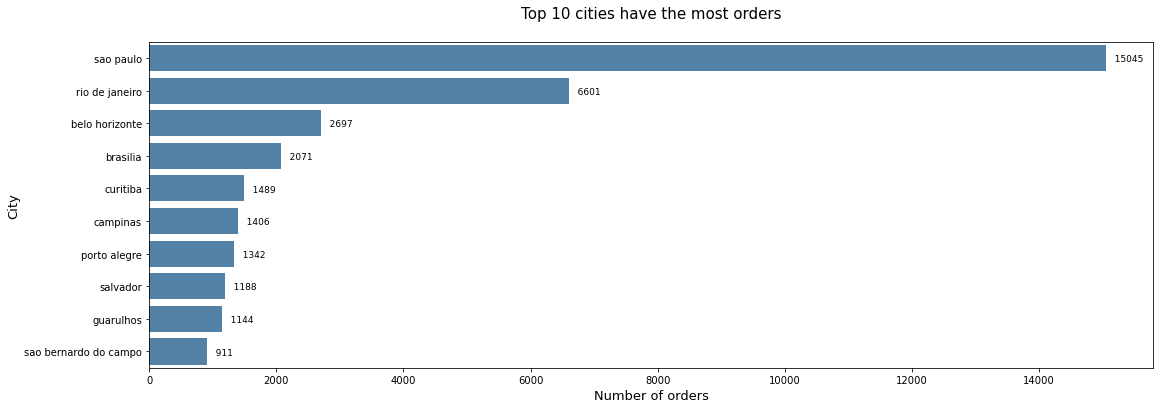

In [28]:
# Visualize top 10 cities have the most sales
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(y='City', x='Number of orders', data=city_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 cities have the most orders\n', fontsize=15)
ax.set_xlabel('Number of orders', fontsize=13)
ax.set_ylabel('City', fontsize=13)
for i, v in enumerate(city_df.head(10)['Number of orders']):
    ax.text(v, i+0.10, '   {}'.format(v), color='black', ha='left', fontsize=9)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**Comment:** It can be seen that sao paulo is the city have the most orders. In the top 10 cities with the most orders, there are 4 cities in SP state: sao paulo, campinas, guarulhos, sao bernardo do campo.

## Oders by time

**Oders by month**

In [29]:
# Calculate number of orders by month
delivered_df['month'] = delivered_df.order_purchase_timestamp.dt.to_period('M')
order_month_df = delivered_df.groupby('month').agg({'order_id':'nunique'}).rename(columns={'order_id':'number_of_orders'})
order_month_df.T

month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
number_of_orders,1,265,1,750,1653,2546,2303,3546,3135,3872,4193,4150,4478,7289,5513,7069,6555,7003,6798,6749,6099,6159,6351


In [30]:
# Change type of index
order_month_df.index = order_month_df.index.astype('str')

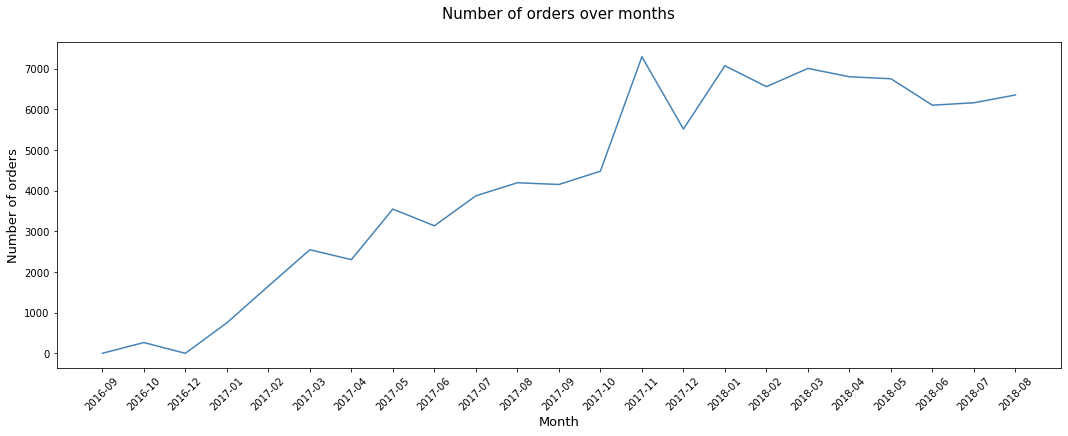

In [31]:
# Visualize number of orders over month
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x=order_month_df.index, y=order_month_df.number_of_orders, color='steelblue', ax=ax)
ax.set_title('Number of orders over months\n', fontsize=15)
ax.set_xlabel('Month', fontsize=13)
ax.set_ylabel('Number of orders', fontsize=13)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

**Comment:** Although there were fluctuations, in general, until 2017 - 11 - the month with the highest number of Olist orders, Olist's order volume tended to increase. After this point, Olist's order volume gradually decreases in the following month, and the months after that there are slight fluctuations.

**Oders by date**

In [32]:
# Calculate number of orders by date
delivered_df['date'] = delivered_df.order_purchase_timestamp.dt.to_period('D')
order_date_df = delivered_df.groupby('date').agg({'order_id':'nunique'}).rename(columns={'order_id':'number_of_orders'})
order_date_df.T

date,2016-09-15,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-12-23,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-12,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-18,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28,2017-03-01,2017-03-02,2017-03-03,2017-03-04,2017-03-05,2017-03-06,2017-03-07,2017-03-08,2017-03-09,2017-03-10,2017-03-11,2017-03-12,2017-03-13,2017-03-14,2017-03-15,2017-03-16,2017-03-17,2017-03-18,2017-03-19,2017-03-20,2017-03-21,2017-03-22,2017-03-23,2017-03-24,2017-03-25,2017-03-26,2017-03-27,2017-03-28,2017-03-29,2017-03-30,2017-03-31,2017-04-01,2017-04-02,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-09,2017-04-10,2017-04-11,2017-04-12,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,2017-04-24,2017-04-25,2017-04-26,2017-04-27,2017-04-28,2017-04-29,2017-04-30,2017-05-01,2017-05-02,2017-05-03,2017-05-04,2017-05-05,2017-05-06,2017-05-07,2017-05-08,2017-05-09,2017-05-10,2017-05-11,2017-05-12,2017-05-13,2017-05-14,2017-05-15,2017-05-16,2017-05-17,2017-05-18,2017-05-19,2017-05-20,2017-05-21,2017-05-22,2017-05-23,2017-05-24,2017-05-25,2017-05-26,2017-05-27,2017-05-28,2017-05-29,2017-05-30,2017-05-31,2017-06-01,2017-06-02,2017-06-03,2017-06-04,2017-06-05,2017-06-06,2017-06-07,2017-06-08,2017-06-09,2017-06-10,2017-06-11,2017-06-12,2017-06-13,2017-06-14,2017-06-15,2017-06-16,2017-06-17,2017-06-18,2017-06-19,2017-06-20,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25,2017-06-26,2017-06-27,2017-06-28,2017-06-29,2017-06-30,2017-07-01,2017-07-02,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10,2017-07-11,2017-07-12,2017-07-13,2017-07-14,2017-07-15,2017-07-16,2017-07-17,2017-07-18,2017-07-19,2017-07-20,2017-07-21,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,...,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,2018-02-05,2018-02-06,2018-02-07,2018-02-08,2018-02-09,2018-02-10,2018-02-11,2018-02-12,2018-02-13,2018-02-14,2018-02-15,2018-02-16,2018-02-17,2018-02-18,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02,2018-03-03,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-17,2018-03-18,2018-03-19,2018-03-20,2018-03-21,2018-03-22,2018-03-23,2018-03-24,2018-03-25,2018-03-26,2018-03-27,2018-03-28,2018-03-29,2018-03-30,2018-03-31,2018-04-01,2018-04-02,2018-04-03,2018-04-04,2018-04-05,2018-04-06,2018-04-07,2018-04-08,2018-04-09,2018-04-10,2018-04-11,2018-04-12,2018-04-13,2018-04-1

In [33]:
# Change type of index
order_date_df.index = order_date_df.index.astype('str')

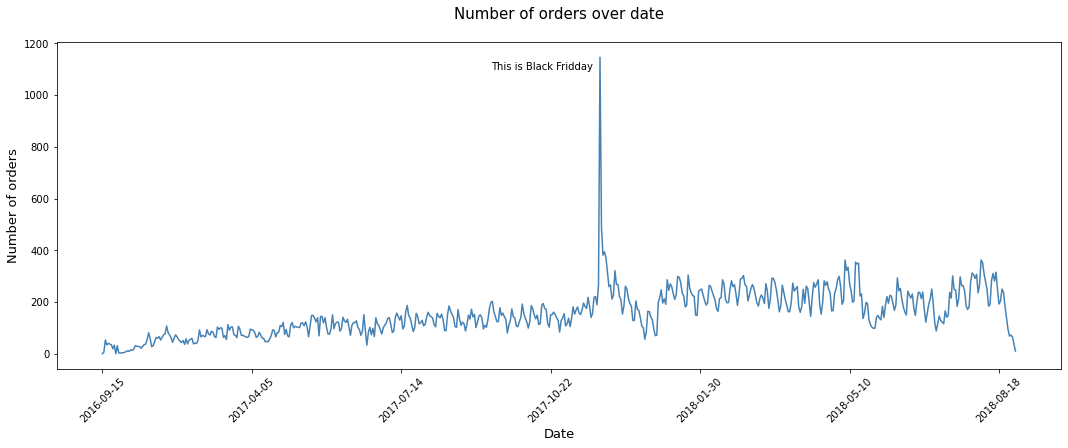

In [34]:
# Visualize number of orders over date
fig, ax = plt.subplots(figsize=(18, 6))
order_date_df.plot(color='steelblue', ax=ax)
ax.set_title('Number of orders over date\n', fontsize=15)
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Number of orders', fontsize=13)
ax.get_legend().remove()
ax.xaxis.set_tick_params(rotation=45)
ax.annotate('This is Black Fridday', xy=(260, 1100))

plt.show()

In [35]:
order_date_df[order_date_df.number_of_orders==order_date_df.number_of_orders.max()]

,number_of_orders
date,
2017-11-24,1147


**Comment** Based on the chart of Number of orders over date, it can be seen that the data has one more special point.  It was 2017-11-24 (Black Friday) with 1147 orders making the graph at this point very steep. This also explains why 2017-11 is the month with the most orders of Olist.

## Delivery analysis

In [36]:
# Create columns 'actual_delivery_days', 'estimate_delivery_days', 'compare_actual_estimate_days', 'delivery_status'
delivered_df['actual_delivery_days'] = (delivered_df.order_delivered_customer_date - delivered_df.order_purchase_timestamp).dt.days
delivered_df['estimated_delivery_days'] = (delivered_df.order_estimated_delivery_date - delivered_df.order_purchase_timestamp).dt.days
delivered_df['compare_actual_estimated_days'] = delivered_df['estimated_delivery_days'] - delivered_df['actual_delivery_days']
delivered_df['delivery_status'] = delivered_df['compare_actual_estimated_days'].apply(lambda x: 'On time' if x>=0 else 'Late')
delivered_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value,month,date,actual_delivery_days,estimated_delivery_days,compare_actual_estimated_days,delivery_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87,2017-05,2017-05-16,8,19,11,On time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48,2018-01,2018-01-12,16,24,8,On time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73,2018-05,2018-05-19,26,24,-2,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30,2018-03,2018-03-13,14,27,13,On time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25,2018-07,2018-07-29,11,16,5,On time


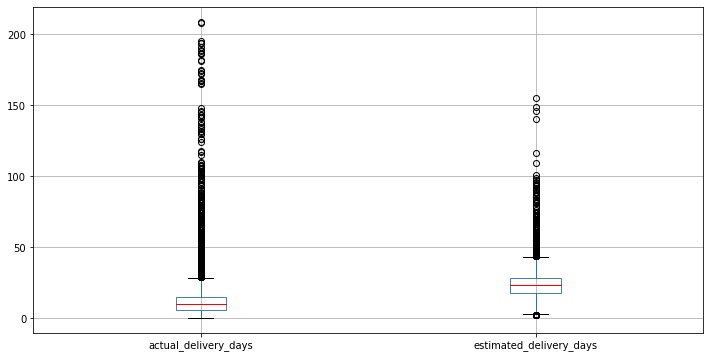

In [37]:
# Visualize boxplots of 'actual_delivery_days', 'estimated_delivery_days'
plt.figure(figsize=(12, 6))
delivery_days_df = delivered_df[['actual_delivery_days', 'estimated_delivery_days']]
delivery_days_df.boxplot(boxprops=dict(color='steelblue'), medianprops = dict(color='red'))
plt.show()

**Comment**: Data has many outliers, need to be filtered before calculating average delivery days.

In [38]:
# Create function to create a data frame have conditions to filter data
def infor_cond_ouliers(df, columns):
    cond_filter_ouliers = df.describe()[columns].T[['min', 'max', '25%', '75%']]
    cond_filter_ouliers['iqr'] = cond_filter_ouliers['75%'] - cond_filter_ouliers['25%']
    cond_filter_ouliers['upper_limit'] = cond_filter_ouliers['75%'] + 1.5 * cond_filter_ouliers['iqr'] 
    cond_filter_ouliers['lower_limit'] = cond_filter_ouliers['25%'] - 1.5 * cond_filter_ouliers['iqr'] 
    return cond_filter_ouliers

In [39]:
# Conditions to filter data
cond_filter_ouliers_days = infor_cond_ouliers(df=delivered_df, columns=['actual_delivery_days', 'estimated_delivery_days'])
cond_filter_ouliers_days = cond_filter_ouliers_days.clip(lower=0)
cond_filter_ouliers_days

,min,max,25%,75%,iqr,upper_limit,lower_limit
actual_delivery_days,0.0,209.0,6.0,15.0,9.0,28.5,0.0
estimated_delivery_days,2.0,155.0,18.0,28.0,10.0,43.0,3.0


In [40]:
# Create variables to store conditions to filter data
actual_delivery_days_upper_limit = cond_filter_ouliers_days.loc['actual_delivery_days', 'upper_limit']
actual_delivery_days_lower_limit = cond_filter_ouliers_days.loc['actual_delivery_days', 'lower_limit']

estimated_delivery_days_upper_limit = cond_filter_ouliers_days.loc['estimated_delivery_days', 'upper_limit']
estimated_delivery_days_lower_limit = cond_filter_ouliers_days.loc['estimated_delivery_days', 'lower_limit']

In [41]:
# Add columns 'filter_actual_delivery_days', 'filter_estimated_delivery_days'
delivered_df['filter_actual_delivery_days'] = delivered_df['actual_delivery_days'].apply(lambda x: 'Keep' if (x <= actual_delivery_days_upper_limit)  & (x >= actual_delivery_days_lower_limit) else 'Remove')
delivered_df['filter_estimated_delivery_days'] = delivered_df['estimated_delivery_days'].apply(lambda x: 'Keep' if (x <= estimated_delivery_days_upper_limit)  & (x >= estimated_delivery_days_lower_limit) else 'Remove')

In [42]:
delivered_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value,month,date,actual_delivery_days,estimated_delivery_days,compare_actual_estimated_days,delivery_status,filter_actual_delivery_days,filter_estimated_delivery_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87,2017-05,2017-05-16,8,19,11,On time,Keep,Keep
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48,2018-01,2018-01-12,16,24,8,On time,Keep,Keep
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73,2018-05,2018-05-19,26,24,-2,Late,Keep,Keep
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30,2018-03,2018-03-13,14,27,13,On time,Keep,Keep
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25,2018-07,2018-07-29,11,16,5,On time,Keep,Keep


In [43]:
# Calculate average delivery days
print('Average actual delivery time is: {} days'.format(int(np.ceil(delivered_df[delivered_df.filter_actual_delivery_days=='Keep'].actual_delivery_days.mean()))))
print('Average estimated delivery time is: {} days'.format(int(np.ceil(delivered_df[delivered_df.filter_estimated_delivery_days=='Keep'].estimated_delivery_days.mean()))))

Average actual delivery time is: 11 days
Average estimated delivery time is: 23 days


**Comment** Compared to the average estimated delivery days, Olist's average actual delivery days is relatively good at just 11 days, less than the estimated 12 days.

In [44]:
# Calculate number of orders by delivery status
delivery_status_df = delivered_df.groupby('delivery_status').agg({'order_id':'nunique'}).sort_values('order_id', ascending=False).reset_index() \
                                 .rename(columns={'delivery_status':'Delivery status', 'order_id': 'Number of orders'})        
delivery_status_df

,Delivery status,Number of orders
0,On time,89171
1,Late,7307


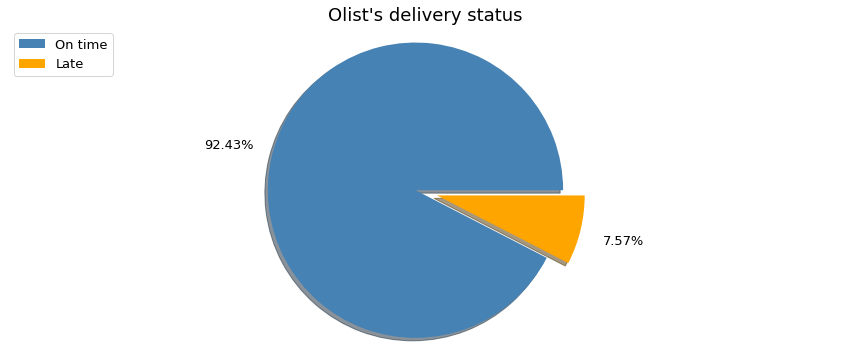

In [45]:
# Visualize order quantity percentage by delivery status
plt.figure(figsize=(15, 6))
explode = [0.1, 0.05]
plt.pie(delivery_status_df['Number of orders'], explode=explode, autopct='%.2f%%', pctdistance=1.3, textprops={'fontsize': 13}, colors=['steelblue', 'orange'], shadow=True)
plt.title('Olist\'s delivery status', fontsize=18) 
plt.axis('equal') 
plt.legend(labels=delivery_status_df['Delivery status'], loc='upper left', fontsize=13) 
plt.show()

In [46]:
# Create data frame store number of late days
late_delivery_days_df = delivered_df[delivered_df.delivery_status=='Late'][['compare_actual_estimated_days']]
late_delivery_days_df = abs(late_delivery_days_df)
print('Shape:', late_delivery_days_df.shape)
late_delivery_days_df.head()

Shape: (7307, 1)


,compare_actual_estimated_days
2,2
18,8
33,1
57,15
85,29


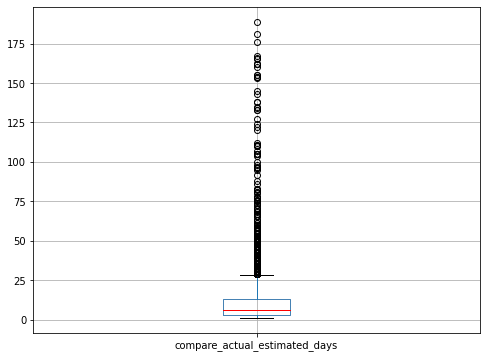

In [47]:
# Visualize boxplot of 'compare_actual_estimated_days', 
plt.figure(figsize=(8, 6))
late_delivery_days_df.boxplot(boxprops=dict(color='steelblue'), medianprops = dict(color='red'))
plt.show()

In [48]:
# Conditions to filter 'compare_actual_estimated_days'
cond_filter_ouliers_late = infor_cond_ouliers(df=late_delivery_days_df, columns=['compare_actual_estimated_days'])
cond_filter_ouliers_late = cond_filter_ouliers_late.clip(lower=0)
cond_filter_ouliers_late

,min,max,25%,75%,iqr,upper_limit,lower_limit
compare_actual_estimated_days,1.0,189.0,3.0,13.0,10.0,28.0,0.0


In [49]:
late_delivery_days_upper_limit = cond_filter_ouliers_late.loc['compare_actual_estimated_days', 'upper_limit']
late_delivery_days_lower_limit = cond_filter_ouliers_late.loc['compare_actual_estimated_days', 'lower_limit']

In [50]:
# Add column 'filter_late_delivery_days'
late_delivery_days_df['filter_late_delivery_days'] = late_delivery_days_df['compare_actual_estimated_days'].apply(lambda x: 'Keep' if (x <= late_delivery_days_upper_limit)  & (x >= late_delivery_days_lower_limit) else 'Remove')

In [51]:
late_delivery_days_df.head()

,compare_actual_estimated_days,filter_late_delivery_days
2,2,Keep
18,8,Keep
33,1,Keep
57,15,Keep
85,29,Remove


**Comment:** Data has many outliers, need to be filtered before calculating average delivery days.

In [52]:
# Calculate average delivery late days
late_delivery_days = int(np.ceil(abs(late_delivery_days_df[late_delivery_days_df.filter_late_delivery_days=='Keep'].compare_actual_estimated_days.mean())))
print('Average number of days late for delivery is: {} days'.format(late_delivery_days))

Average number of days late for delivery is: 8 days


**Comment**: The number of late delivery orders of Olist is 7307 orders, accounting for 7.57%. The average delivery delay is 8 days. These are relatively high numbers, Olist needs to take measures to improve this situation.

## Review analysis

In [53]:
# Create 'delivered_reviews_df' store review score of delivered orders
delivered_reviews_df = reviews_df[reviews_df.order_id.isin(delivered_df.order_id)][['order_id', 'review_id', 'review_score']]
print('Shape:', delivered_reviews_df.shape)
delivered_reviews_df.head()

Shape: (96361, 3)


,order_id,review_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4
1,a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5
2,f9e4b658b201a9f2ecdecbb34bed034b,228ce5500dc1d8e020d8d1322874b6f0,5
3,658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,f7c4243c7fe1938f181bec41a392bdeb,5


In [54]:
review_score_df = delivered_reviews_df.groupby('review_score').size().to_frame().rename(columns={0:'number_of_rwviews'})
review_score_df

,number_of_rwviews
review_score,
1,9406
2,2941
3,7961
4,18987
5,57066


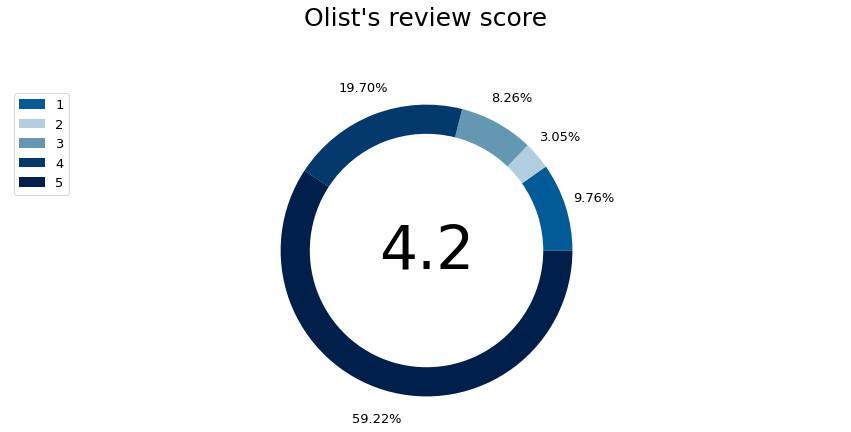

In [55]:
# Visualize Olit's review score using donut chart
colors=['#005b96', '#b3cde0', '#6497b1', '#03396c', '#011f4b']
plt.figure(figsize=(15, 6))
plt.pie(review_score_df['number_of_rwviews'], autopct='%.2f%%', pctdistance=1.2, wedgeprops=dict(width=0.2), textprops={'fontsize': 13}, colors=colors)
plt.title('Olist\'s review score\n\n', fontsize=25) 
plt.axis('equal') 
plt.legend(labels=review_score_df.index, loc='upper left', fontsize=13) 
plt.text(0., 0., round(delivered_reviews_df.review_score.mean(), 1), horizontalalignment='center', verticalalignment='center', fontsize=60)
plt.show()

**Comment:** Olist's average review score is 4.2. Reviews 5 ✩ and 4 still accounted for the most at 59.22% and 19.70% respectively (total of about 78.92%). Review 3 ✩ accounts for 8.26%. Review 2 ✩ accounts for at least 3.05%. And review 1 ✩ accounted for 9.76%. In general, these are acceptable numbers but still need further improvement.

# Product analysis

## Items by product category

In [56]:
# Calculate number of sold items by product category
items_product_category_df = item_product_category.groupby('product_category_name').agg({'order_item_id':'sum'}).sort_values('order_item_id', ascending=False).reset_index() \
                                                 .rename(columns={'product_category_name':'Product category', 'order_item_id':'Number of items'})

items_product_category_df.head(10)

,Product category,Number of items
0,bed bath table,13485
1,furniture decor,11302
2,health beauty,10849
3,sports leisure,9698
4,computers accessories,9650
5,housewares,8831
6,watches gifts,6459
7,garden tools,5773
8,telephony,5034
9,auto,4772


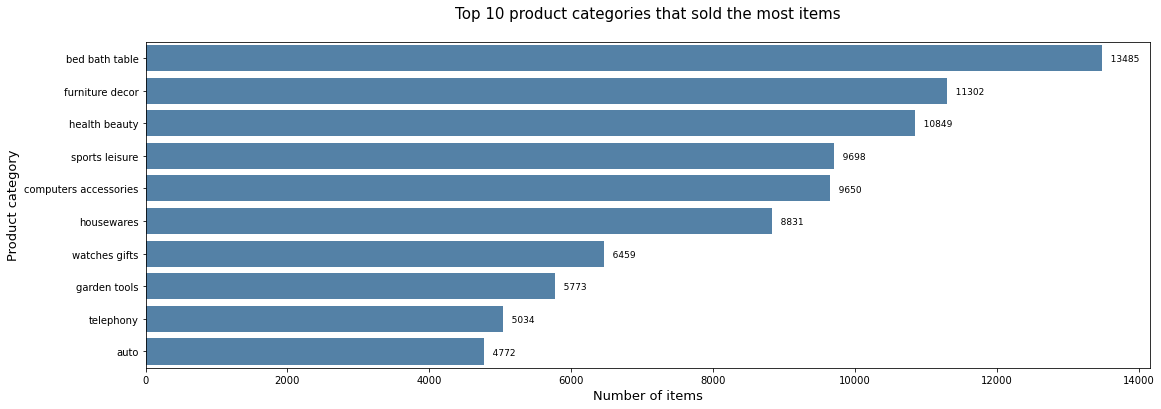

In [57]:
# Visualize top 10 product categories that sold the most items
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(y='Product category', x='Number of items', data=items_product_category_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 product categories that sold the most items\n', fontsize=15)
ax.set_xlabel('Number of items', fontsize=13)
ax.set_ylabel('Product category', fontsize=13)
for i, v in enumerate(items_product_category_df.head(10)['Number of items']):
    ax.text(v, i+0.10, '   {}'.format(v), color='black', ha='left', fontsize=9)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

## Sales by product category

In [58]:
# Calculate sales by product category
sales_product_category_df = item_product_category.groupby('product_category_name').agg({'value':'sum'}).sort_values('value', ascending=False).reset_index() \
                                                 .rename(columns={'product_category_name':'Product category', 'value':'Sales'})

sales_product_category_df.head(10)

,Product category,Sales
0,health beauty,1517369.99
1,bed bath table,1458745.64
2,watches gifts,1327390.46
3,computers accessories,1287206.54
4,sports leisure,1232845.82
5,furniture decor,1132546.05
6,housewares,911264.95
7,auto,750954.24
8,cool stuff,717722.00
9,garden tools,685925.71


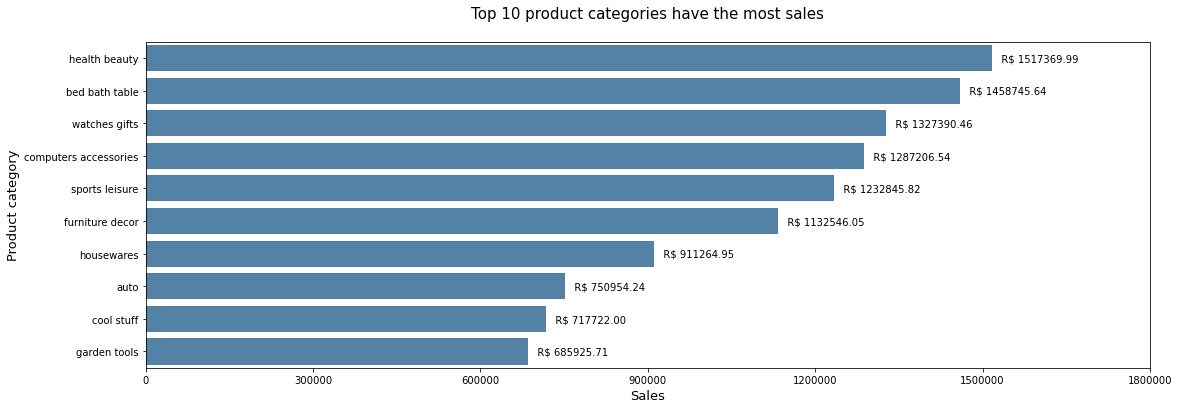

In [59]:
# Visualize top 10 product categories have the most sales
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(y='Product category', x='Sales', data=sales_product_category_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 product categories have the most sales\n', fontsize=15)
ax.set_xlabel('Sales', fontsize=13)
ax.set_ylabel('Product category', fontsize=13)
ax.set_xticks(np.arange(0, 2100000, 300000))
for i, v in enumerate(sales_product_category_df.head(10)['Sales']):
    ax.text(v, i+0.10, '   R$ {:.2f}'.format(v), color='black', ha='left', fontsize=10)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [60]:
top_10_product_categories_items = set(items_product_category_df.head(10)['Product category'].values)
top_10_product_categories_sales = set(sales_product_category_df.head(10)['Product category'].values)

intersection_product_catogories = top_10_product_categories_items.intersection(top_10_product_categories_sales)
len(intersection_product_catogories)

print('Top 10 product catogories sold the most items:', items_product_category_df.head(10)['Product category'].values,'\n')
print('Top 10 product catogories have the most sales:', sales_product_category_df.head(10)['Product category'].values, '\n')
print('In which, there are {} product catogories that are both in the top 10 product catogories that sell the most items and in the top 10 product catogories that bring in the most sales:\n{}'.format(len(intersection_product_catogories), intersection_product_catogories), '\n')
print('Product catogory in Top 10 product catogories sold the most items but not in Top 10 product catogories have the most sales is: {}'.format(top_10_product_categories_items.difference(top_10_product_categories_sales)), '\n')
print('Product catogory in Top 10 product catogories have the most sales but not in Top 10 product catogories sold the most items is: {}'.format(top_10_product_categories_sales.difference(top_10_product_categories_items)), '\n')

Top 10 product catogories sold the most items: ['bed bath table' 'furniture decor' 'health beauty' 'sports leisure'
 'computers accessories' 'housewares' 'watches gifts' 'garden tools'
 'telephony' 'auto'] 

Top 10 product catogories have the most sales: ['health beauty' 'bed bath table' 'watches gifts' 'computers accessories'
 'sports leisure' 'furniture decor' 'housewares' 'auto' 'cool stuff'
 'garden tools'] 

In which, there are 9 product catogories that are both in the top 10 product catogories that sell the most items and in the top 10 product catogories that bring in the most sales:
{'watches gifts', 'housewares', 'computers accessories', 'sports leisure', 'health beauty', 'furniture decor', 'auto', 'bed bath table', 'garden tools'} 

Product catogory in Top 10 product catogories sold the most items but not in Top 10 product catogories have the most sales is: {'telephony'} 

Product catogory in Top 10 product catogories have the most sales but not in Top 10 product catogories so

**Comment:** From the above results, it can be seen that not the product categories that sell the most items also bring the most sales respectively. For example, bed bath table sold the most items but only brought in the second most sales, or health beauty sold the third most items but brought the most sales in Olist...